In [1]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt
from scipy.spatial.distance import cosine
import itertools

In [2]:
rounds = np.arange(1, 101, 1)
rounds

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [3]:
result_dir = '/mnt/disk1/duongtn/ShapleyFL/SV_result/synthetic_classification_cnum10_dist11_skew1.0_seed0'
exact_dir = 'exact-10'
exact = list()
for i in range(1, 101):
    with open(os.path.join(result_dir, exact_dir, 'Round{}.npy'.format(i)), 'rb') as f:
        exact.append(pickle.load(f).tolist())
exact = np.array(exact)

In [4]:
cosine_simi = list()
for i in rounds:
    tmp = list()
    for j in rounds:
        tmp.append(1 - cosine(exact[i - 1], exact[j - 1]))
    cosine_simi.append(tmp)
cosine_simi = np.array(cosine_simi)

In [5]:
cosine_simi[0]

array([1.        , 0.97826777, 0.96440199, 0.95984144, 0.95403643,
       0.94900757, 0.94933744, 0.94832883, 0.94452885, 0.9425575 ,
       0.94566487, 0.93833221, 0.94178707, 0.94236743, 0.94477358,
       0.94230747, 0.94362038, 0.93766028, 0.94039442, 0.93978468,
       0.94255616, 0.94226872, 0.94037061, 0.94053222, 0.94025754,
       0.94671725, 0.94462527, 0.93787896, 0.94486621, 0.94056246,
       0.94049   , 0.94110204, 0.94302557, 0.94289877, 0.94250892,
       0.94156178, 0.94332787, 0.94130025, 0.93949602, 0.9419968 ,
       0.94398181, 0.94149146, 0.94157516, 0.93995475, 0.942263  ,
       0.94150937, 0.94168752, 0.94120443, 0.94139173, 0.94138452,
       0.93820755, 0.94199882, 0.9413971 , 0.93910237, 0.94193589,
       0.94185274, 0.94049396, 0.94084701, 0.94177494, 0.94236943,
       0.94230466, 0.94006718, 0.94406041, 0.94236928, 0.94169914,
       0.94243761, 0.94289948, 0.94353732, 0.94276915, 0.94415412,
       0.94273907, 0.94147754, 0.9432681 , 0.94387101, 0.94056

In [6]:
values = list()
for i in rounds:
    tmp = list()
    for j in rounds:
        tmp.append(np.exp(- np.abs(i - j) / 1000))
    values.append(tmp)
values = np.array(values)
values[0]

array([1.        , 0.9990005 , 0.998002  , 0.9970045 , 0.99600799,
       0.99501248, 0.99401796, 0.99302444, 0.99203191, 0.99104038,
       0.99004983, 0.98906028, 0.98807171, 0.98708414, 0.98609754,
       0.98511194, 0.98412732, 0.98314368, 0.98216103, 0.98117936,
       0.98019867, 0.97921896, 0.97824024, 0.97726248, 0.97628571,
       0.97530991, 0.97433509, 0.97336124, 0.97238837, 0.97141646,
       0.97044553, 0.96947557, 0.96850658, 0.96753856, 0.9665715 ,
       0.96560542, 0.96464029, 0.96367614, 0.96271294, 0.96175071,
       0.96078944, 0.95982913, 0.95886978, 0.95791139, 0.95695396,
       0.95599748, 0.95504196, 0.9540874 , 0.95313379, 0.95218113,
       0.95122942, 0.95027867, 0.94932887, 0.94838001, 0.94743211,
       0.94648515, 0.94553914, 0.94459407, 0.94364995, 0.94270677,
       0.94176453, 0.94082324, 0.93988289, 0.93894347, 0.938005  ,
       0.93706746, 0.93613086, 0.9351952 , 0.93426047, 0.93332668,
       0.93239382, 0.93146189, 0.9305309 , 0.92960083, 0.92867

In [7]:
np.abs(cosine_simi - values).max()

0.0899275692604049

In [8]:
result_dir = '/mnt/disk1/duongtn/ShapleyFL/SV_result/synthetic_classification_cnum10_dist11_skew1.0_seed0'
exact_dir = 'exact-8'
with open(os.path.join(result_dir, exact_dir, 'fill_exact2.npy'.format(i)), 'rb') as f:
    exact_8 = pickle.load(f)

In [11]:
loss = 0.0
count = 0
for i, j in itertools.combinations(range(0, 100), 2):
    loss += max(0.0, 1.0 - np.exp(- np.abs(i - j) / 1000))
    count += 1
loss /= count
loss

0.032841555655043486

In [10]:
i = 1
1 - cosine(exact_8[i], exact[i])

0.9963372472986745

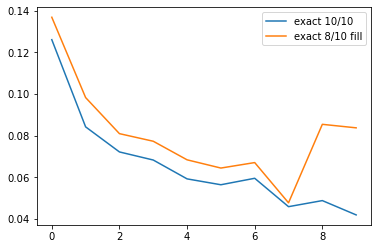

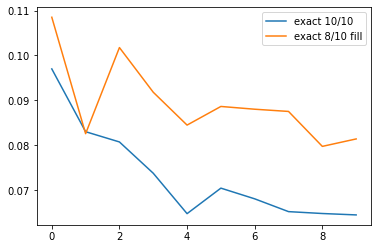

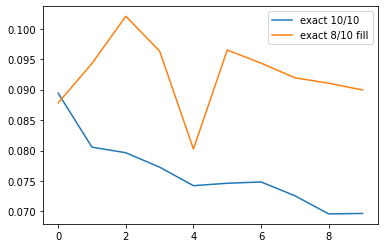

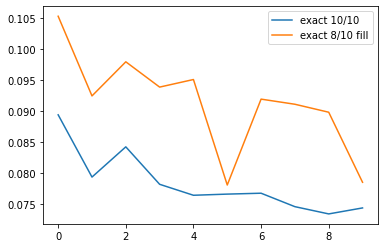

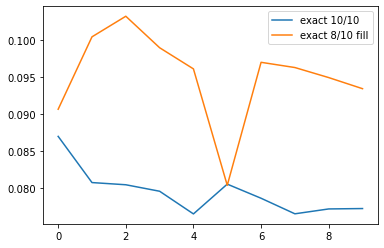

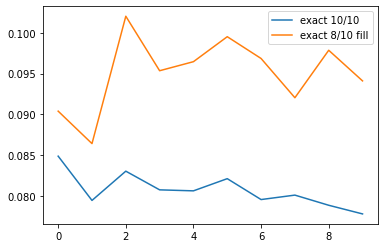

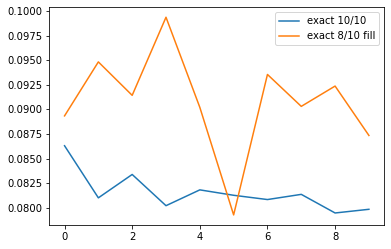

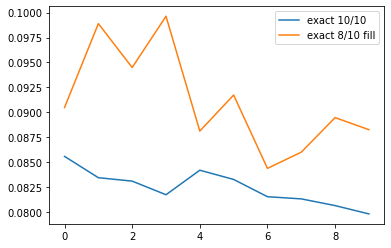

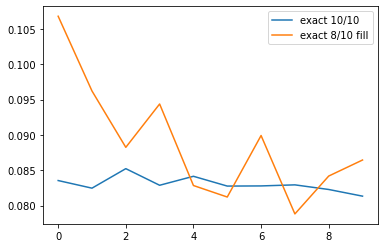

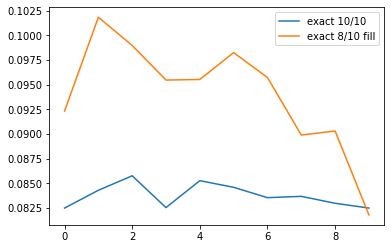

In [15]:
for e, e8 in zip(exact[:10], exact_8[:10]):
    plt.plot(e, label='exact 10/10')
    plt.plot(e8, label='exact 8/10 fill')
    plt.legend()
    plt.show()